In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
online=pd.read_excel("/content/Online retail.xlsx")

In [ ]:
online

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [ ]:
online.fillna(0,inplace=True)

In [ ]:
online

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [ ]:
tran=[]
for i in range(0,len(online)):
    # Iterate only over the available columns in the DataFrame.
    tran.append([str(online.values[i,j]) for j in range(0, online.shape[1]) if str(online.values[i,j])!='0'])

In [ ]:
tran

[['burgers,meatballs,eggs'],
 ['chutney'],
 ['turkey,avocado'],
 ['mineral water,milk,energy bar,whole wheat rice,green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta,french fries'],
 ['soup,light cream,shallot'],
 ['frozen vegetables,spaghetti,green tea'],
 ['french fries'],
 ['eggs,pet food'],
 ['cookies'],
 ['turkey,burgers,mineral water,eggs,cooking oil'],
 ['spaghetti,champagne,cookies'],
 ['mineral water,salmon'],
 ['mineral water'],
 ['shrimp,chocolate,chicken,honey,oil,cooking oil,low fat yogurt'],
 ['turkey,eggs'],
 ['turkey,fresh tuna,tomatoes,spaghetti,mineral water,black tea,salmon,eggs,chicken,extra dark chocolate'],
 ['meatballs,milk,honey,french fries,protein bar'],
 ['red wine,shrimp,pasta,pepper,eggs,chocolate,shampoo'],
 ['rice,sparkling water'],
 ['spaghetti,mineral water,ham,body spray,pancakes,green tea'],
 ['burgers,grated cheese,shrimp,pasta,avocado,honey,white wine,toothpaste'],
 ['eggs'],
 ['parmesan cheese,spaghetti,soup,avocado,milk,fresh bread'],
 ['ground

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# Encode transactions using TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(tran).transform(tran)
ap = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
ap

,almonds,"almonds,cake,low fat yogurt","almonds,cookies","almonds,eggs","almonds,eggs,cookies","almonds,eggs,cooking oil,french fries,green tea","almonds,eggs,yogurt cake","almonds,french wine","almonds,french wine,green tea,french fries,escalope,strawberries,tomato juice,honey","almonds,pancakes,eggs,chocolate,french fries,mint",...,"yams,mineral water,energy bar,eggs,fresh bread","yams,mineral water,french fries","yams,mineral water,soup,milk,pancakes,whole wheat rice,barbecue sauce,carrots,chocolate,champagne","yams,mint",yogurt cake,"yogurt cake,candy bars","yogurt cake,energy drink","yogurt cake,honey","yogurt cake,low fat yogurt","yogurt cake,mint"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


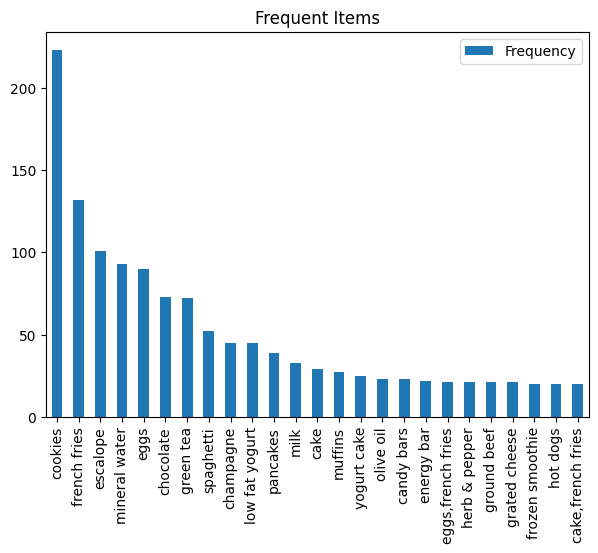

In [ ]:
# Plot frequent items
ap.sum().to_frame('Frequency').sort_values('Frequency', ascending=False)[:25].plot(kind='bar', figsize=(7, 5), title="Frequent Items")
plt.show()

### Apriori Algorithm

In [ ]:
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
frequent_itemsets = apriori(ap,min_support=0.01, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.029733,(cookies)
1,0.012000,(eggs)
2,0.013467,(escalope)
3,0.017600,(french fries)
4,0.012400,(mineral water)


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [ ]:
rules.sort_values('lift',ascending = False)[0:20]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [ ]:
rules[rules.lift>3]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [ ]:
rules[rules.lift>1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


### Analysis and Interpretation

In [ ]:
# Sort the rules by lift to identify the strongest relationships
rules = rules.sort_values(by='lift', ascending=False)

# Display the top 10 rules with the highest lift
print(rules.head(10))

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Rule interpretation function
def interpret_rules(rules):
    for idx, rule in rules.iterrows():
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))
        support = rule['support']
        confidence = rule['confidence']
        lift = rule['lift']

        print(f"Rule: If a customer buys {antecedent}, they are likely to buy {consequent}.")
        print(f"Support: {support:.2f}, Confidence: {confidence:.2f}, Lift: {lift:.2f}")
        print("-" * 80)

# Apply the function to the top 10 rules
interpret_rules(rules.head(10))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Interview Questions

**What is lift and why is it important in Association rules?**

Lift measures how much more likely two items are to be purchased together than would be expected if they were statistically independent. It is calculated as:
Lift
(
𝐴
,
𝐵
)
=
𝑃
(
𝐴
∩
𝐵
)
𝑃
(
𝐴
)
×
𝑃
(
𝐵
)
Lift(A,B)=
P(A)×P(B)
P(A∩B)
​

It is important because it helps to identify strong rules; a lift value greater than 1 suggests a positive association.

**What are support and confidence? How do you calculate them?**

Support is the proportion of transactions that contain a particular item or itemset. It is calculated as:
Support
(
𝐴
)
=
Number of transactions containing A
Total number of transactions
Support(A)=
Total number of transactions
Number of transactions containing A
​

Confidence measures the likelihood of purchasing item B when item A is purchased. It is calculated as:
Confidence
(
𝐴
→
𝐵
)
=
𝑃
(
𝐴
∩
𝐵
)
𝑃
(
𝐴
)
Confidence(A→B)=
P(A)
P(A∩B)
​

**What are some limitations or challenges of Association rules mining?**

Interpretability: Rules can be numerous and complex, making it hard to extract actionable insights.
Scalability: As the dataset size grows, computational requirements increase significantly.
Sparsity: In large datasets, many itemsets may not appear frequently enough to form reliable rules.
Parameter Sensitivity: The choice of support, confidence, and lift thresholds can significantly impact the results, leading to potential biases.







